In [3]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywaffle
import squarify
%matplotlib inline

In [4]:
""" This code takes the weighted topics and makes visualizations"""

' This code takes the weighted topics and makes visualizations'

In [5]:
df_topics = pd.read_csv('topicsquantified_revised22.csv', header=0, index_col=0)
dftopics_code = pd.read_csv('topics_list_coded22.csv', header=0)

#fill in missing papers
df_topics['paper'].fillna(method='ffill', inplace=True)

#find the average weight of each topic per paper
dfgrp=df_topics.groupby('paper').mean()

In [6]:
#find the biggest topic for each paper
maxes=dfgrp.idxmax(axis=1)

#transpose that df
dft=dfgrp.T
dft['topicID']=list(range(0,22))

#join the topics to the dataframe
df=pd.merge(dft, dftopics_code, how='inner',on='topicID')
df.drop(['topicID'], axis=1, inplace=True)

In [7]:
outfile=open('alltopics-weights22.csv', 'w')
df.to_csv(outfile)

In [8]:
#average for each topic across all newspapers 
df['avg']=df.mean(axis=1)

In [9]:
df.head(5)

atlantic     blaze  breitbart       fox    huffpo  inforwars     msnbc  \
0  0.058321  0.030929   0.043086  0.036154  0.053930   0.032725  0.038163   
1  0.014368  0.028919   0.016758  0.043632  0.023610   0.027971  0.017926   
2  0.020106  0.038377   0.034999  0.027204  0.032459   0.030633  0.011459   
3  0.016135  0.019494   0.011431  0.025134  0.028260   0.025440  0.018025   
4  0.014991  0.007881   0.017583  0.014745  0.014433   0.019786  0.035686   

        npr       nyt       wsj  \
0  0.050771  0.020557  0.022615   
1  0.019299  0.009862  0.010794   
2  0.020673  0.008228  0.008053   
3  0.024382  0.030576  0.035609   
4  0.015262  0.014586  0.015015   

                                         description      general specific  \
0  gun control violence shooting owner law mass a...  gun control       na   
1  police officer department incident city county...     incident   police   
2  ar 15 rifle automatic semi used round style sh...     gun type    ar 15   
3  school student high shooting florida parkland ...     incident  arkland   
4  trump president white house wednesday policy h...   government    trump   

        avg  
0  0.038725  
1  0.021314  
2  0.023219  
3  0.023449  
4  0.016997

In [10]:
#calculate average for the liberal and conservative papers
df['lib']=(df['nyt']+ df['npr']+ df['huffpo']+ df['atlantic']+ df['msnbc'])/5
df['consv']=(df['fox'] +df['wsj']+ df['breitbart']+ df['inforwars']+ df['blaze'])/5
df['diff']=abs(df['lib']-df['consv'])
df.head(5)

atlantic     blaze  breitbart       fox    huffpo  inforwars     msnbc  \
0  0.058321  0.030929   0.043086  0.036154  0.053930   0.032725  0.038163   
1  0.014368  0.028919   0.016758  0.043632  0.023610   0.027971  0.017926   
2  0.020106  0.038377   0.034999  0.027204  0.032459   0.030633  0.011459   
3  0.016135  0.019494   0.011431  0.025134  0.028260   0.025440  0.018025   
4  0.014991  0.007881   0.017583  0.014745  0.014433   0.019786  0.035686   

        npr       nyt       wsj  \
0  0.050771  0.020557  0.022615   
1  0.019299  0.009862  0.010794   
2  0.020673  0.008228  0.008053   
3  0.024382  0.030576  0.035609   
4  0.015262  0.014586  0.015015   

                                         description      general specific  \
0  gun control violence shooting owner law mass a...  gun control       na   
1  police officer department incident city county...     incident   police   
2  ar 15 rifle automatic semi used round style sh...     gun type    ar 15   
3  school student high shooting florida parkland ...     incident  arkland   
4  trump president white house wednesday policy h...   government    trump   

        avg       lib     consv      diff  
0  0.038725  0.044348  0.033102  0.011247  
1  0.021314  0.017013  0.025615  0.008602  
2  0.023219  0.018585  0.027853  0.009268  
3  0.023449  0.023476  0.023422  0.000054  
4  0.016997  0.018991  0.015002  0.003989

In [11]:
#exclude the topics that are meta data
df=df[df['general'] != 'meta']

In [12]:
#find totals for all the liberal outlets and all the conservative outlates
ltot=df['lib'].sum()
ctot = df['consv'].sum()

In [13]:
grp=df.groupby('general', as_index=False).sum()
grp


general  atlantic     blaze  breitbart       fox    huffpo  inforwars  \
0   government  0.038280  0.020374   0.034545  0.031371  0.030660   0.033011   
1  gun control  0.058321  0.030929   0.043086  0.036154  0.053930   0.032725   
2     gun type  0.042700  0.065907   0.074346  0.049570  0.058783   0.054569   
3     incident  0.090602  0.137138   0.095643  0.184184  0.125775   0.128259   
4        legal  0.118513  0.111720   0.192334  0.116332  0.131541   0.105019   
5        sales  0.007797  0.014237   0.008480  0.015214  0.015307   0.014459   

      msnbc       npr       nyt       wsj       avg       lib     consv  \
0  0.071273  0.037820  0.029317  0.032681  0.035933  0.041470  0.030397   
1  0.038163  0.050771  0.020557  0.022615  0.038725  0.044348  0.033102   
2  0.035093  0.042189  0.024174  0.023459  0.047079  0.040588  0.053570   
3  0.176097  0.110075  0.111857  0.121291  0.128092  0.122881  0.133303   
4  0.083665  0.120842  0.081782  0.078083  0.113983  0.107268  0.120697   
5  0.003485  0.021315  0.025982  0.029405  0.015568  0.014777  0.016359   

       diff  
0  0.011073  
1  0.011247  
2  0.012982  
3  0.036544  
4  0.039326  
5  0.001582

In [14]:
print(ltot, ctot)

0.3713324404998969 0.3874277777729991


In [15]:
labels=grp['general']
lx={}
for k,v in zip(labels, grp['lib']):
    v=int((v*100)/ltot)
    lx[k]=v
    
cx={}
for k,v in zip(labels, grp['consv']):
    v=int((v*100)/ctot)
    cx[k]=v
    


In [16]:
def makewaffles(mytallies, who, mytitle):
    fig=plt.figure(FigureClass=pywaffle.Waffle, rows=10, columns=10,values=mytallies, 
    title={'label':'Gun Control Topics in' + who + 'Media', 'loc':'left'},
    labels=["{0} ({1}%)".format(k,v) for k,v in mytallies.items()],
    legend={'loc':'best', 'bbox_to_anchor':(1.55,.6)})
    fig.savefig(mytitle+'grid.png')

In [53]:
def maketrees(polarity, polarity_dict, colors):
    squarify.plot(polarity_dict.values(), label = ["{0} ({1}%)".format(k,v) for k,v in polarity_dict.items()], 
              color=colors, alpha=.4)
    plt.axis('off')

In [54]:
liberalcolors=["#08519c", "#3182bd" , "#6baed6" , "#9ecae1" , '#c6dbef',"#eff3ff"]
conservcolors=["#a50f15", "#de2d26", "#fb6a4a", "#fc9272", "#fcbba1", "#fee5d9"]

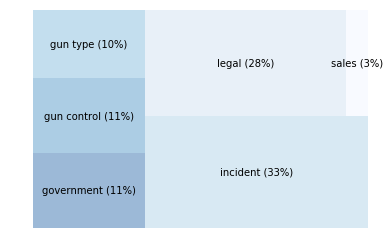

In [55]:
maketrees("Liberal", lx, liberalcolors)


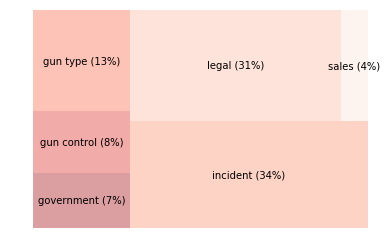

In [56]:
maketrees("Conservative", cx, conservcolors)

In [ ]:
#plot the breakdown of topics in liberal outlets
makewaffles(lx, "Liberal", "libtopics")

In [ ]:
#plot the breakdown of topics in conservative outlets
makewaffles(cx, "Convervative", "constopics")

In [ ]:
#What are the incident topics?
inlabel=df[df['general']=='incident']['specific']

In [ ]:
incidentlx={}
for k,v in zip(inlabel, df['lib']):
    v=int((v*100)/ltot)
    incidentlx[k]=v
    
incidentcx={}
for k,v in zip(inlabel, df['consv']):
    v=int((v*100)/ltot)
    incidentcx[k]=v

In [ ]:
#What does the breakdown of incident topics look like for Liberal outlets
#Find another visual for this

In [ ]:
#What does the breakdown of incident topics look like for Conservative outlets
#Find another visual for this

In [ ]:
#turn the dataframe into a pivot table
#pass it to seaborn

In [ ]:
grp1=grp.pivot_table(index = 'general', values = ['fox', 'wsj', 'breitbart', 'inforwars', 'blaze', 'nyt', 'npr', 'huffpo', 'atlantic', 'msnbc']
                )

In [ ]:
import seaborn as sns

In [ ]:
sns.heatmap(grp1, cmap="Blues")